# Evaluation Project 8 : Rainfall Weather Forecasting

**Project Description :**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

**Problem Statement:**

Target:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import  r2_score, accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset:

weather=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
# To display top 5 rows:

weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# To display total number of rows and columns:

weather.shape

(8425, 23)

**There are 8425 rows and 23 columns present in this dataset.**

In [5]:
# Checking all the columns:

weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Checking datatypes of all the columns:

weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**There are object and float64 datatypes are present.**

In [7]:
# To get the Descriptive Statistics of continuous Data:

weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [8]:
# To get the brief information of data :

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
# Finding the null values :
weather.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

**There are many columns where null values are present . We have to treat these null values.**

**As we have to predict the target variable , so let's start working on the target variable.**

In [10]:
# To find the unique values in target variable:

weather['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
weather['Rainfall'].unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00,
       8.000e-01, 6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01,
       1.800e+00, 8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01,
       2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01,
       4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00,
       5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01,
       7.000e+00, 2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01,
       6.600e+01, 1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01,
       1.860e+01, 7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00,
       4.000e+00, 2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01,
       1.900e+01, 2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01,
       1.920e+01, 1.880e+01, 1.480e+01, 1.200e+01, 

In [11]:
# To find the total value count in target variable:
weather['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [13]:
weather['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [14]:
# To find the number of unique values in targer variable "Rainfall":

weather['Rainfall'].nunique()

250

In [15]:
# Checking number of unique values in all the columns :

weather.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Data Cleaning:

In [16]:
# checking total percentage of null values in each column of dataset:

In [17]:
weather.isnull().sum()/weather.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [ ]:
# Let's find the value count of those columns where maximum null values are present:

In [18]:
weather['Evaporation'].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [19]:
weather['Sunshine'].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [20]:
weather['Cloud9am'].value_counts()

7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

In [21]:
weather['Cloud3pm'].value_counts()

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

**We observed that the 4 columns(Evaporation,Sunshine,Cloud9am,Cloud3pm) have less than 50% missing data. If we drop these column then our approx 50% data will be lost, So we’ll use them in our model with proper imputation and will drop rest column's rows.**

In [22]:
def randomsampleimputation(weather, variable):
    weather[variable]=weather[variable]
    random_sample=weather[variable].dropna().sample(weather[variable].isnull().sum(),random_state=0)
    random_sample.index=weather[weather[variable].isnull()].index
    weather.loc[weather[variable].isnull(),variable]=random_sample
    
    
randomsampleimputation(weather, "Cloud9am")
randomsampleimputation(weather, "Cloud3pm")
randomsampleimputation(weather, "Evaporation")
randomsampleimputation(weather, "Sunshine")

In [23]:
# To verify , if the null values are handled or not:

weather.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation         0
Sunshine            0
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am            0
Cloud3pm            0
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [24]:
continuous_feature= ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
categorical_feature= [ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow' ]

In [25]:
for feature in continuous_feature:
    if(weather[feature].isnull().sum()*100/len(weather))>0:
        weather[feature] = weather[feature].fillna(weather[feature].median())

In [26]:
#checking again null values after droping rows
weather.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

**Filling null values in Categorical column:**

In [27]:
for feature in categorical_feature:
    if(weather[feature].isnull().sum()*100/len(weather))>0:
        weather[feature] = weather[feature].fillna(weather[feature].mode()[0])

In [28]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Great , there are no null values . We can go ahead.**

**There is one column named "Date " , so let's convert it's datatype to "date-time" datatype.**

In [29]:
#Converting dayatype of 'Date' column from object datatype to datetime datatype
weather['Date']=pd.to_datetime(weather['Date']) 

In [30]:
#mapping day values to 'Day' column in main dataframe
weather['Day']=weather['Date'].apply(lambda d:d.day) 

In [31]:
#mapping month values to 'Month' column in main dataframe
weather['Month']=weather['Date'].apply(lambda m:m.month) 

In [32]:
 #mapping Year values to 'Year' column in main Date
weather['Year']=weather['Date'].apply(lambda y:y.year)

In [33]:
# let's drop "date" column:

In [34]:
weather=weather.drop(columns="Date", axis=1)

In [35]:
# To verify , if the column dropped or not:
weather.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

# Data Visualization:

**Univariate Analysis:**

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


<AxesSubplot:xlabel='Location', ylabel='count'>

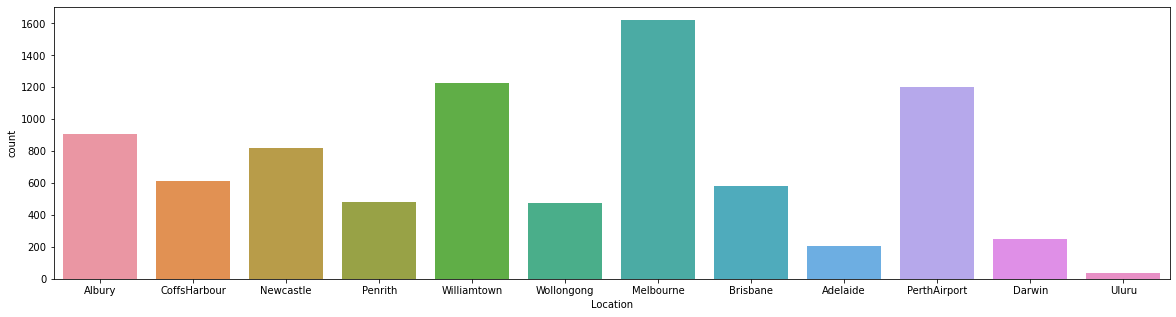

In [36]:
#Count Plot for "Location" column
print(weather["Location"].value_counts())
plt.figure(figsize=(20,5))
sns.countplot("Location",data=weather)

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

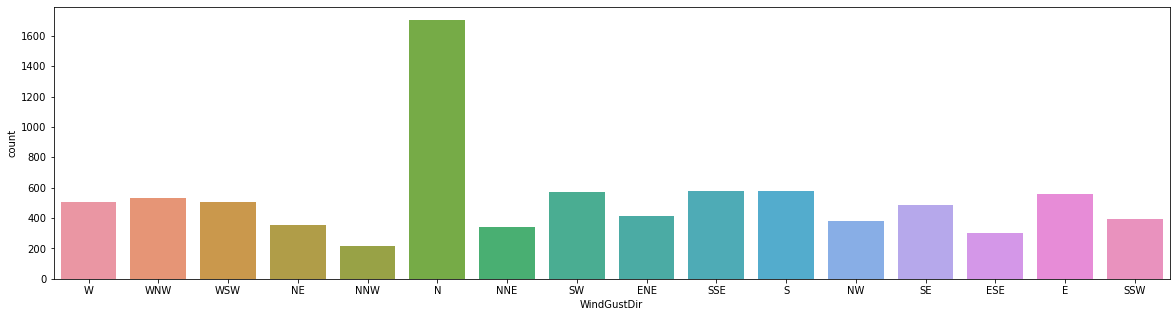

In [37]:
#Count Plot for "WindGustDir" column
print(weather["WindGustDir"].value_counts())
plt.figure(figsize=(20,5))
sns.countplot("WindGustDir",data=weather)

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

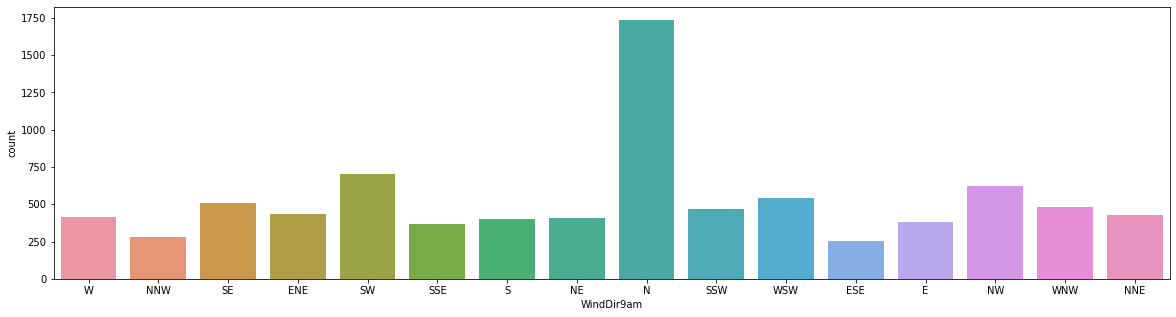

In [38]:
#Count Plot for "WindDir9am" column
print(weather["WindDir9am"].value_counts())
plt.figure(figsize=(20,5))
sns.countplot("WindDir9am",data=weather)

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

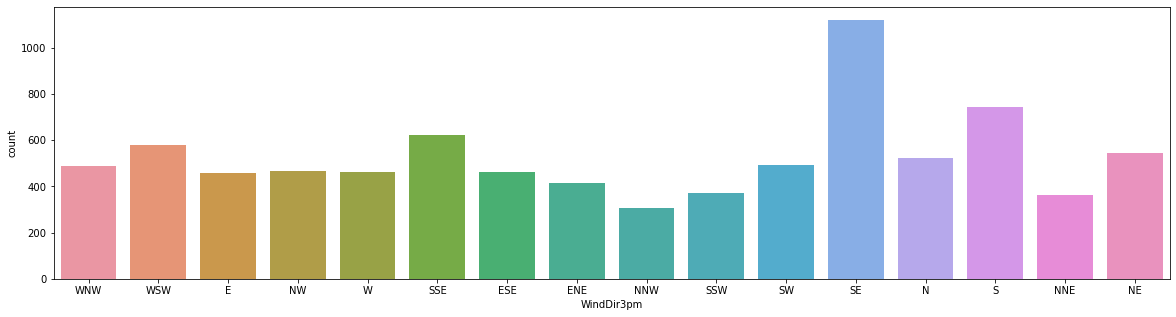

In [39]:
#Count Plot for "WindDir3pm" column
print(weather["WindDir3pm"].value_counts())
plt.figure(figsize=(20,5))
sns.countplot("WindDir3pm",data=weather)

No     6435
Yes    1990
Name: RainToday, dtype: int64


<AxesSubplot:xlabel='RainToday', ylabel='count'>

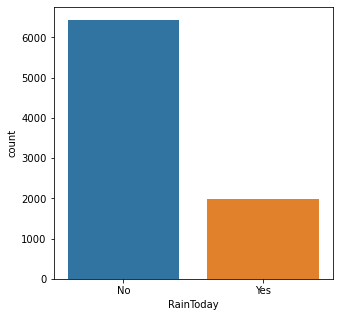

In [40]:
#Count Plot for "RainToday" column
print(weather["RainToday"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("RainToday",data=weather)

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

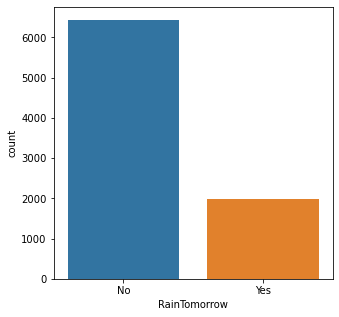

In [41]:
#Count Plot for "RainTomorrow" column
print(weather["RainTomorrow"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("RainTomorrow",data=weather)

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

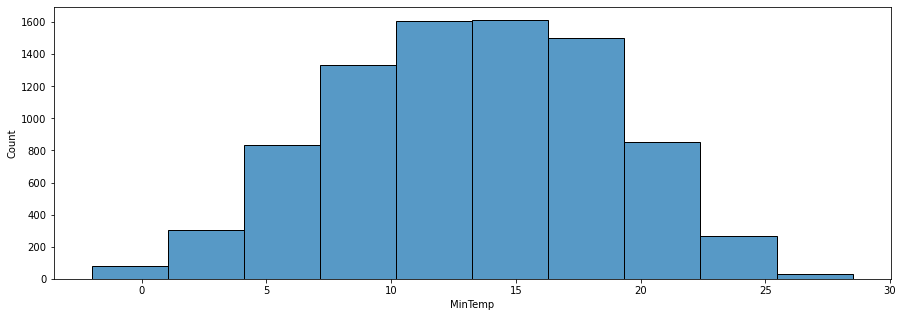

In [42]:
#Histplot for "MinTemp" column
plt.figure(figsize=(15,5))
sns.histplot(x='MinTemp',data=weather,bins=10)

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

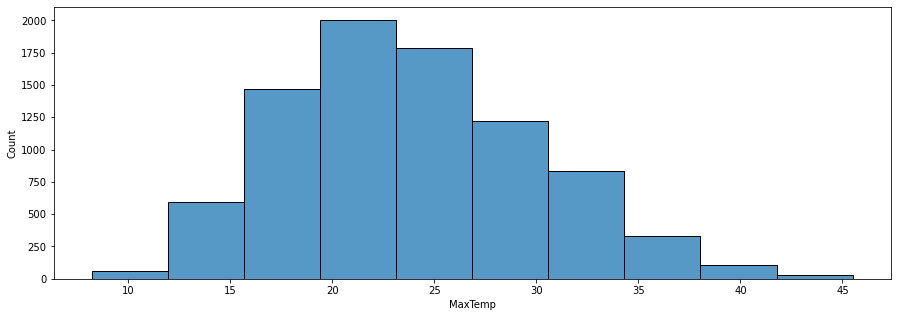

In [43]:
#Histplot for "MaxTemp" column
plt.figure(figsize=(15,5))
sns.histplot(x='MaxTemp',data=weather,bins=10)

<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

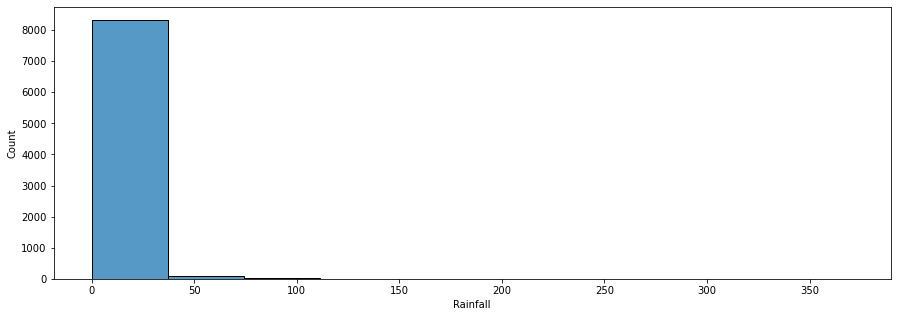

In [44]:
#Histplot for "Rainfall" column
plt.figure(figsize=(15,5))
sns.histplot(x='Rainfall',data=weather,bins=10)

<AxesSubplot:xlabel='Evaporation', ylabel='Count'>

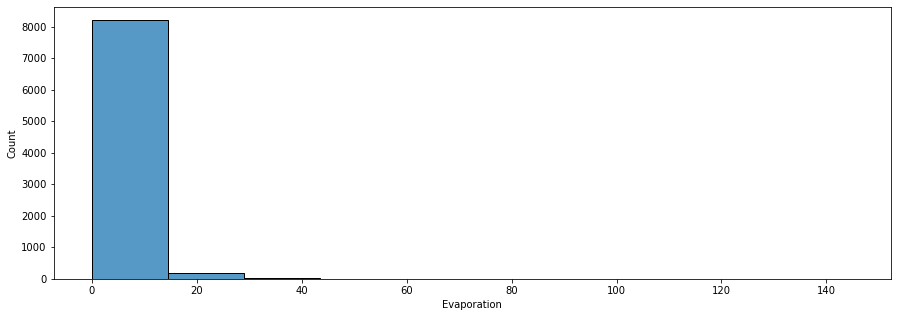

In [45]:
#Histplot for "Evaporation" column
plt.figure(figsize=(15,5))
sns.histplot(x='Evaporation',data=weather,bins=10)

<AxesSubplot:xlabel='Sunshine', ylabel='Count'>

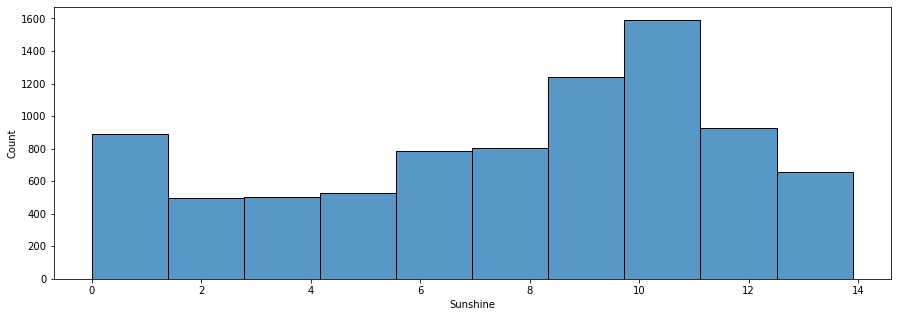

In [46]:
#Histplot for "Sunshine" column
plt.figure(figsize=(15,5))
sns.histplot(x='Sunshine',data=weather,bins=10)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Count'>

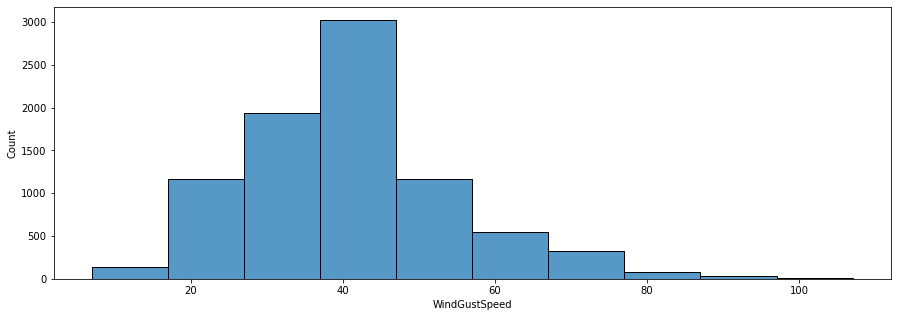

In [47]:
#Histplot for "WindGustSpeed" column
plt.figure(figsize=(15,5))
sns.histplot(x='WindGustSpeed',data=weather,bins=10)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Count'>

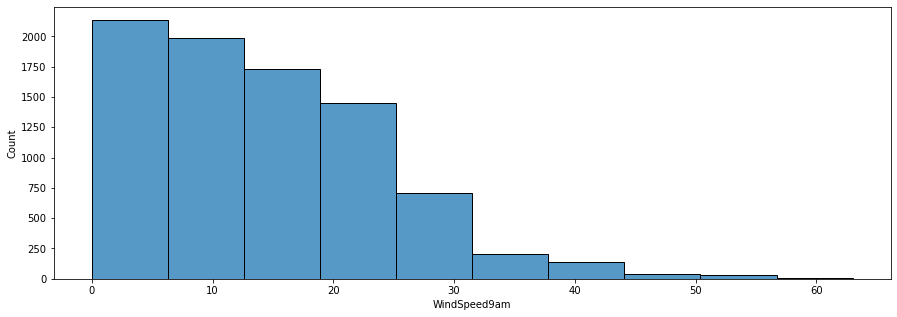

In [48]:
#Histplot for "WindSpeed9am" column
plt.figure(figsize=(15,5))
sns.histplot(x='WindSpeed9am',data=weather,bins=10)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Count'>

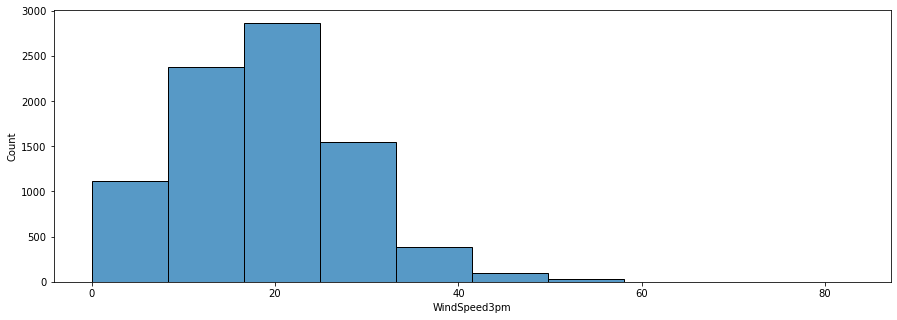

In [49]:
#Histplot for "WindSpeed3pm" column
plt.figure(figsize=(15,5))
sns.histplot(x='WindSpeed3pm',data=weather,bins=10)

<AxesSubplot:xlabel='Humidity9am', ylabel='Count'>

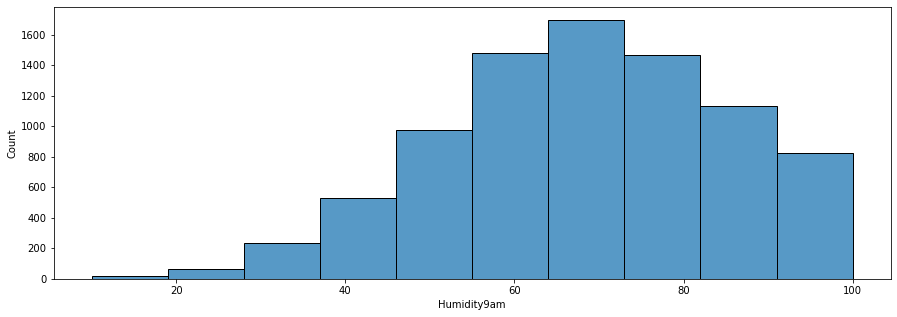

In [50]:
#Histplot for "Humidity9am" column
plt.figure(figsize=(15,5))
sns.histplot(x='Humidity9am',data=weather,bins=10)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Count'>

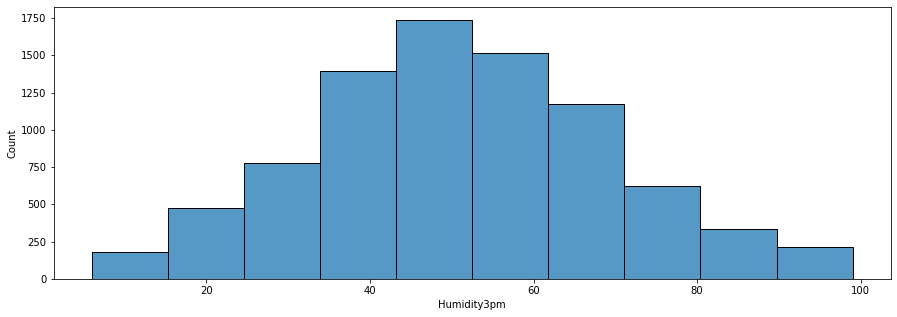

In [51]:
#Histplot for "Humidity3pm" column
plt.figure(figsize=(15,5))
sns.histplot(x='Humidity3pm',data=weather,bins=10)

<AxesSubplot:xlabel='Pressure9am', ylabel='Count'>

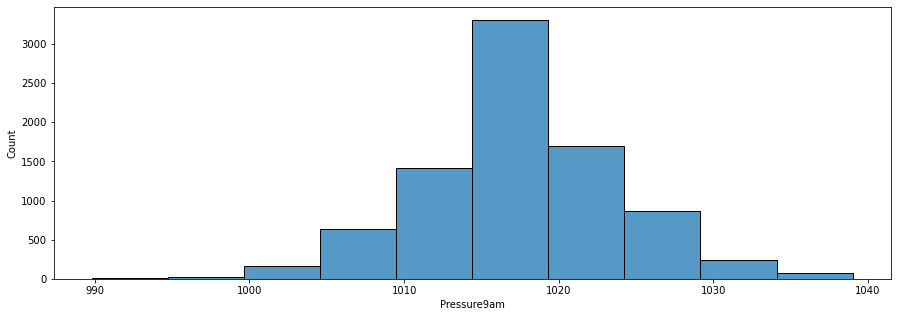

In [52]:
#Histplot for "Pressure9am" column
plt.figure(figsize=(15,5))
sns.histplot(x='Pressure9am',data=weather,bins=10)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Count'>

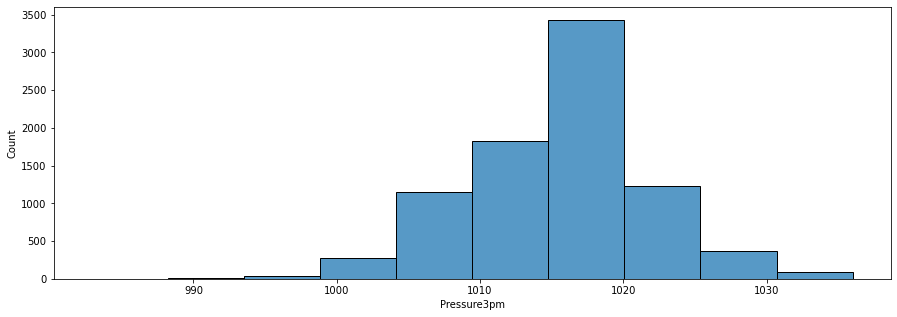

In [53]:
#Histplot for "Pressure3pm" column
plt.figure(figsize=(15,5))
sns.histplot(x='Pressure3pm',data=weather,bins=10)

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

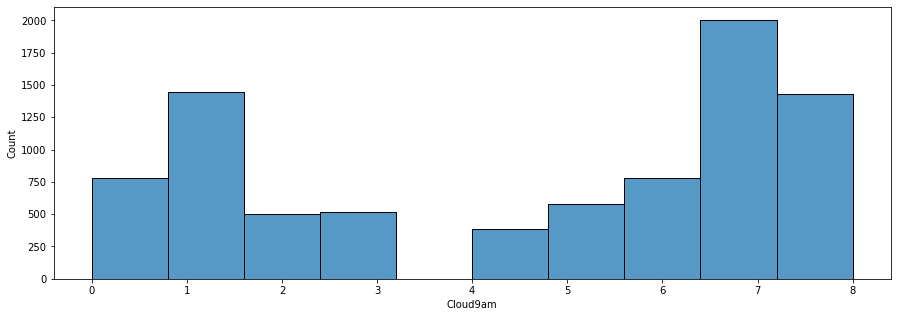

In [54]:
#Histplot for "Cloud9am" column
plt.figure(figsize=(15,5))
sns.histplot(x='Cloud9am',data=weather,bins=10)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

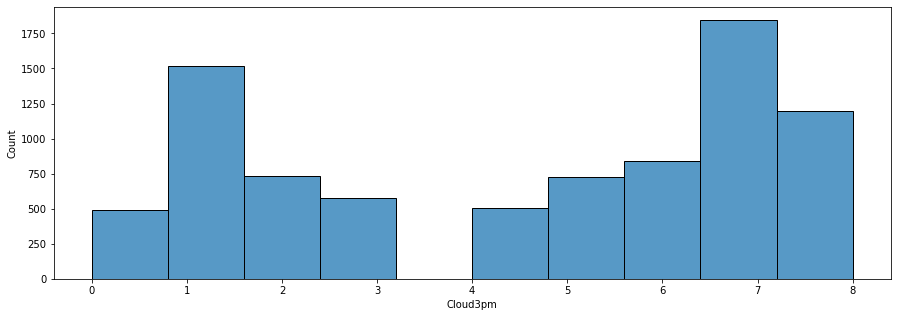

In [55]:
#Histplot for "Cloud3pm" column
plt.figure(figsize=(15,5))
sns.histplot(x='Cloud3pm',data=weather,bins=10)

<AxesSubplot:xlabel='Temp9am', ylabel='Count'>

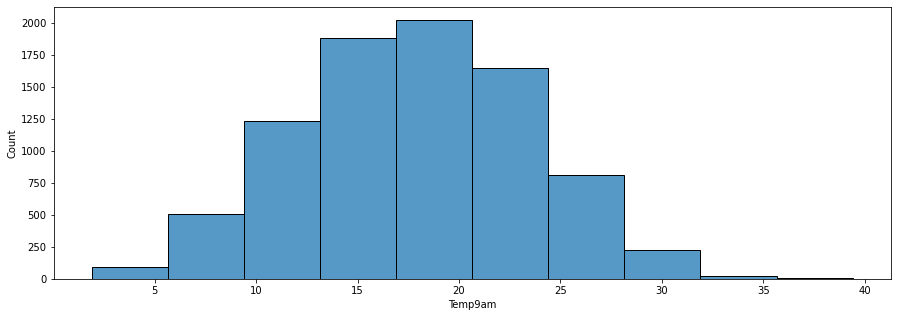

In [56]:
#Histplot for "Temp9amTemp9am" column
plt.figure(figsize=(15,5))
sns.histplot(x='Temp9am',data=weather,bins=10)

<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

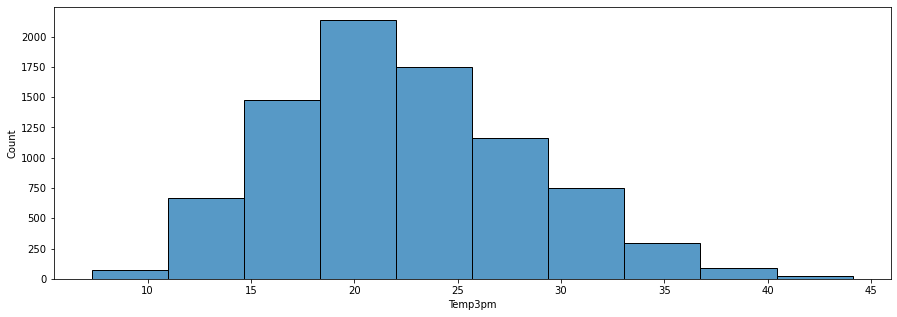

In [57]:
#Histplot for "Temp3pm" column
plt.figure(figsize=(15,5))
sns.histplot(x='Temp3pm',data=weather,bins=10)

<AxesSubplot:xlabel='Day', ylabel='Count'>

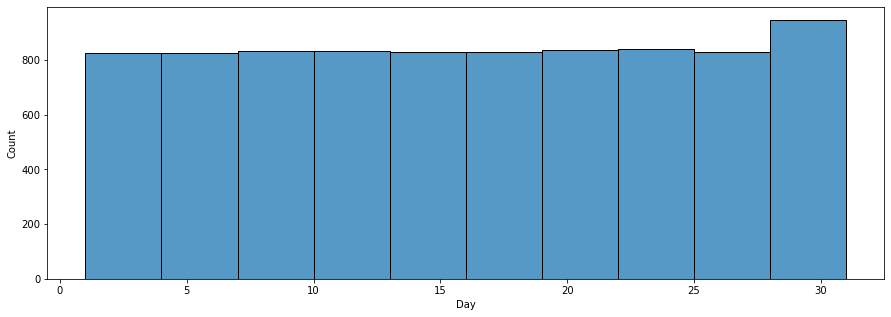

In [58]:
#Histplot for "Day" column
plt.figure(figsize=(15,5))
sns.histplot(x='Day',data=weather,bins=10)

<AxesSubplot:xlabel='Month', ylabel='Count'>

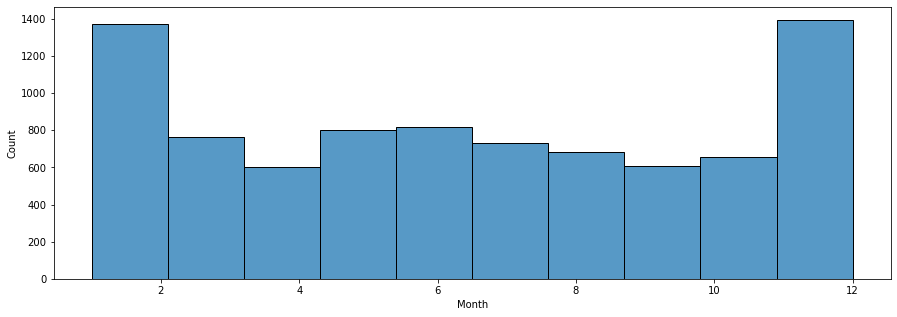

In [59]:
#Histplot for "Month" column
plt.figure(figsize=(15,5))
sns.histplot(x='Month',data=weather,bins=10)

<AxesSubplot:xlabel='Year', ylabel='Count'>

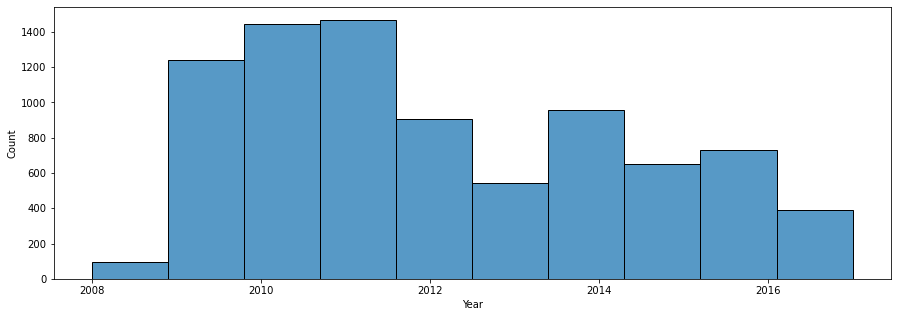

In [60]:
#Histplot for "Year" column
plt.figure(figsize=(15,5))
sns.histplot(x='Year',data=weather,bins=10)

**Bivariate Analysis:**

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

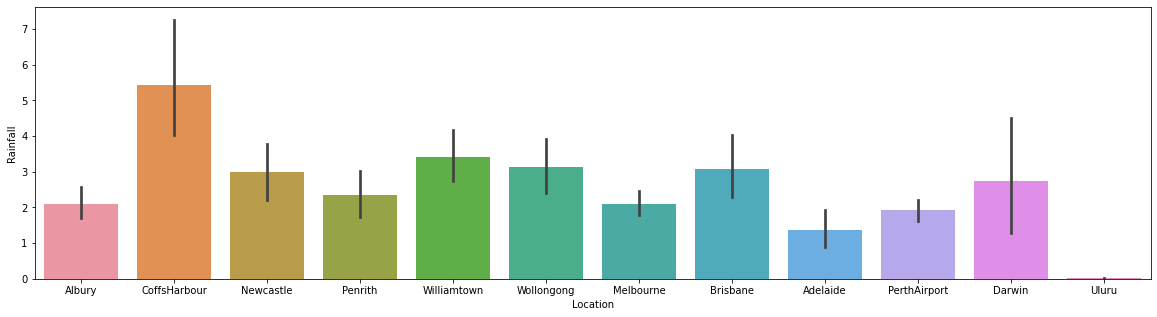

In [61]:
#Count Plot for comparision between "Location" column and "Rainfall" column
plt.figure(figsize=(20,5))
sns.barplot("Location",data=weather, y='Rainfall')

<AxesSubplot:xlabel='Location', ylabel='count'>

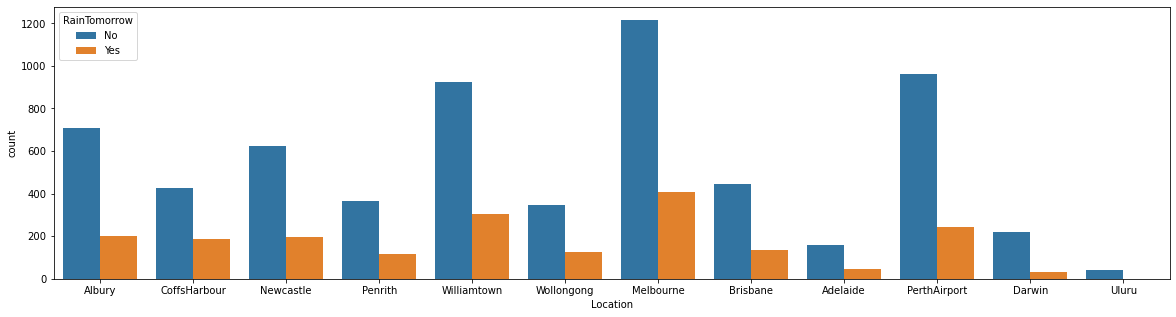

In [62]:
#Count Plot for comparision between "Location" column and "Rainfall" column
plt.figure(figsize=(20,5))
sns.countplot("Location",data=weather, hue='RainTomorrow')

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

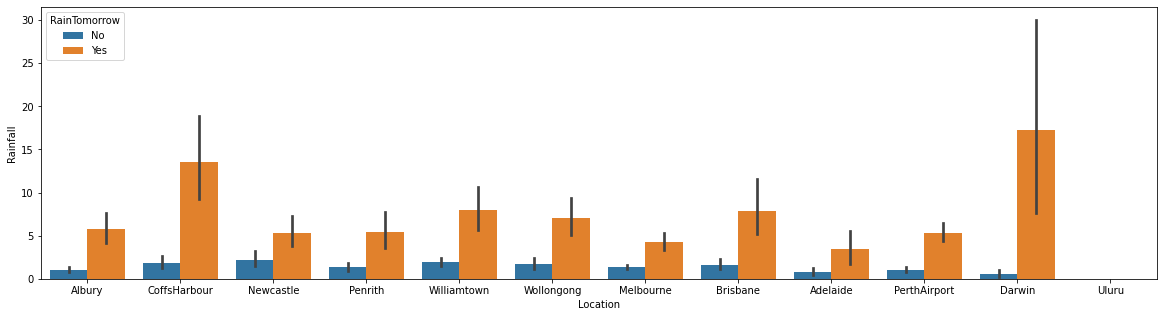

In [63]:
plt.figure(figsize=(20,5))
sns.barplot("Location",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

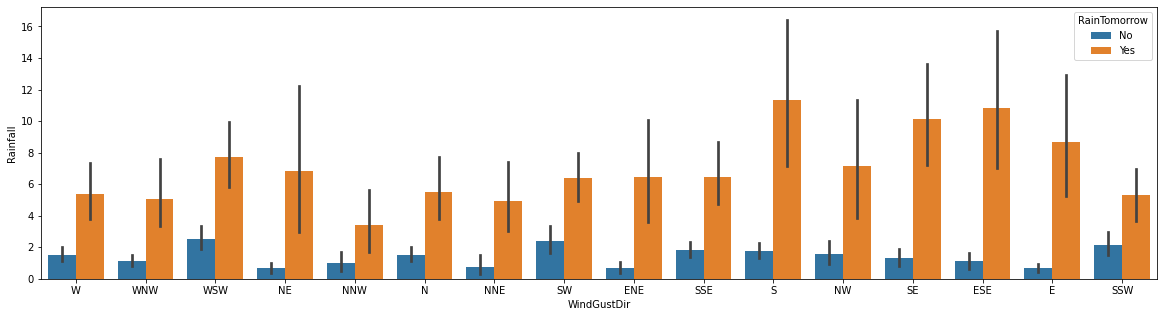

In [64]:
plt.figure(figsize=(20,5))
sns.barplot("WindGustDir",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

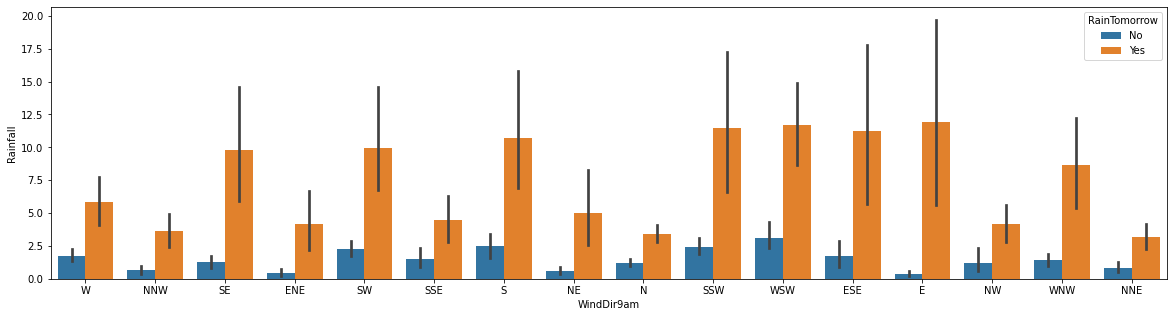

In [65]:
plt.figure(figsize=(20,5))
sns.barplot("WindDir9am",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

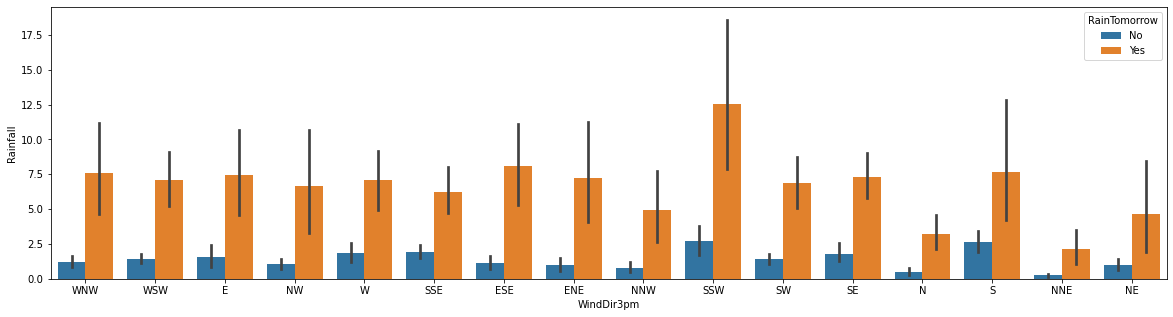

In [66]:
plt.figure(figsize=(20,5))
sns.barplot("WindDir3pm",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

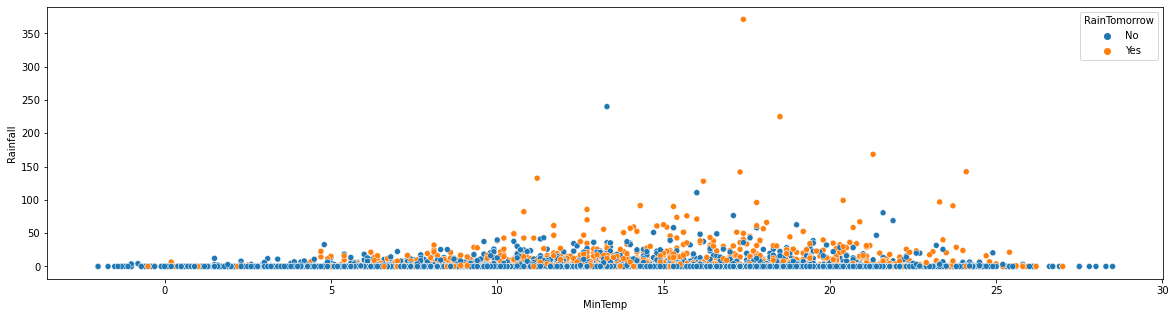

In [67]:
plt.figure(figsize=(20,5))
sns.scatterplot("MinTemp",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

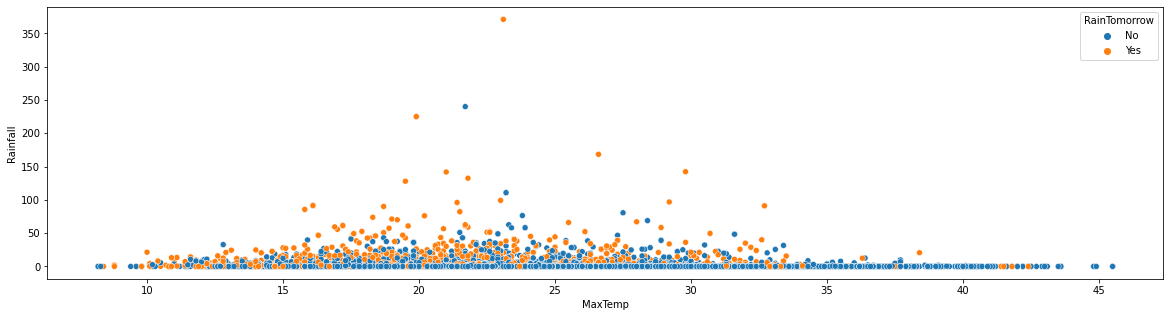

In [68]:
plt.figure(figsize=(20,5))
sns.scatterplot("MaxTemp",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

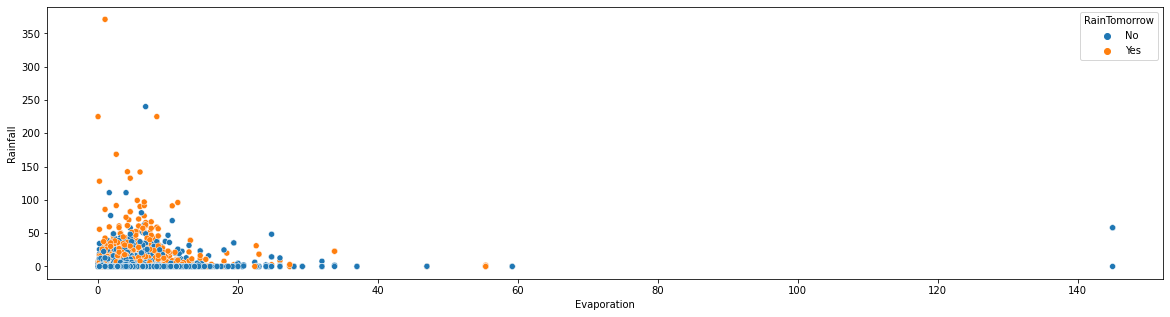

In [69]:
plt.figure(figsize=(20,5))
sns.scatterplot("Evaporation",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

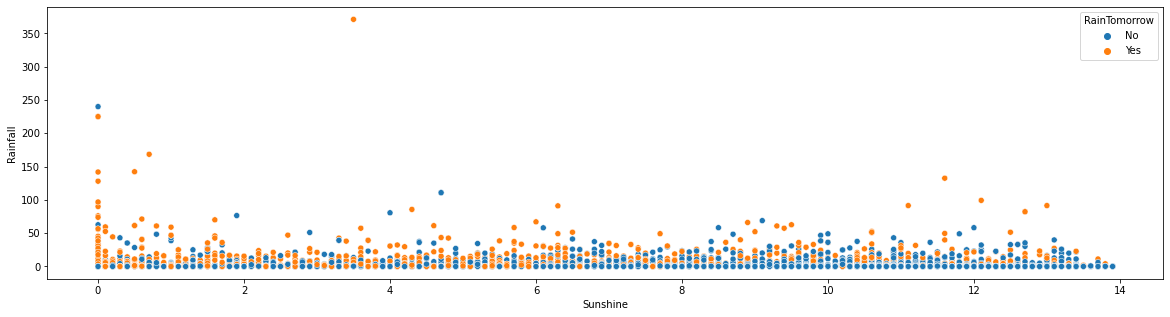

In [70]:
plt.figure(figsize=(20,5))
sns.scatterplot("Sunshine",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

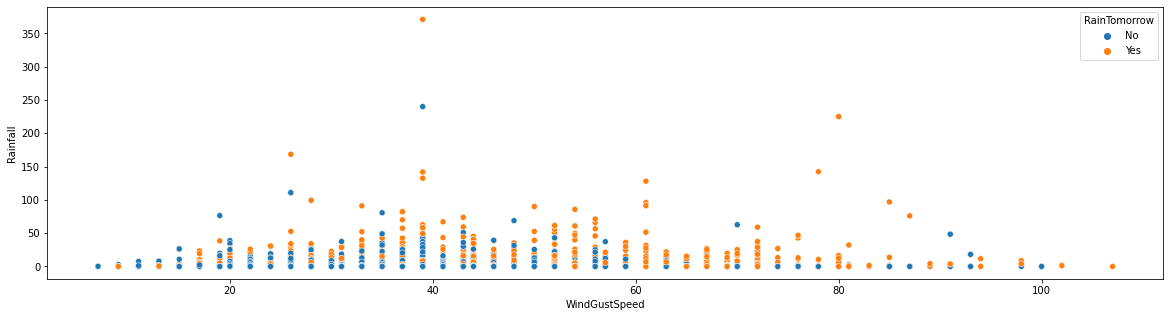

In [71]:
plt.figure(figsize=(20,5))
sns.scatterplot("WindGustSpeed",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

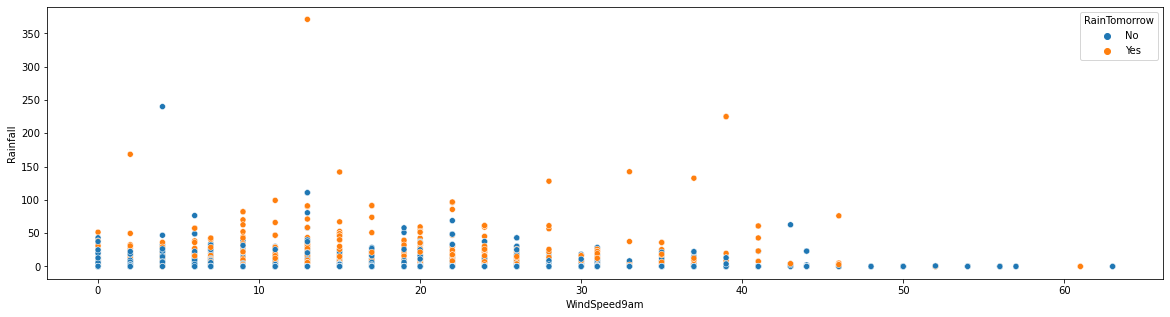

In [72]:
plt.figure(figsize=(20,5))
sns.scatterplot("WindSpeed9am",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

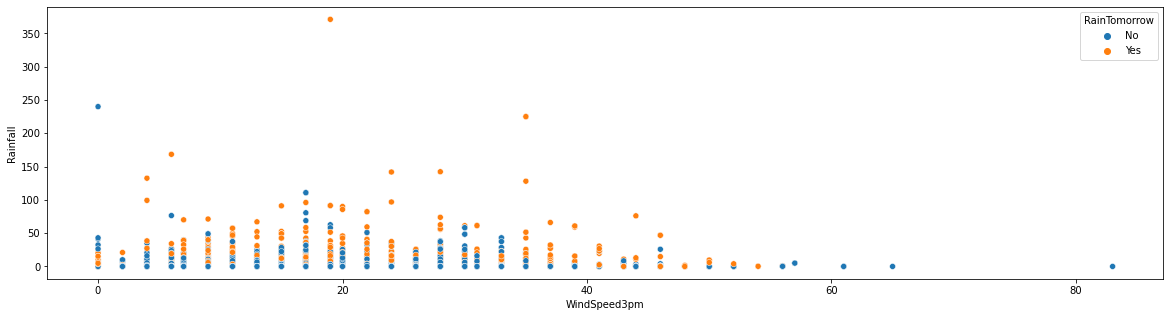

In [73]:
plt.figure(figsize=(20,5))
sns.scatterplot("WindSpeed3pm",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

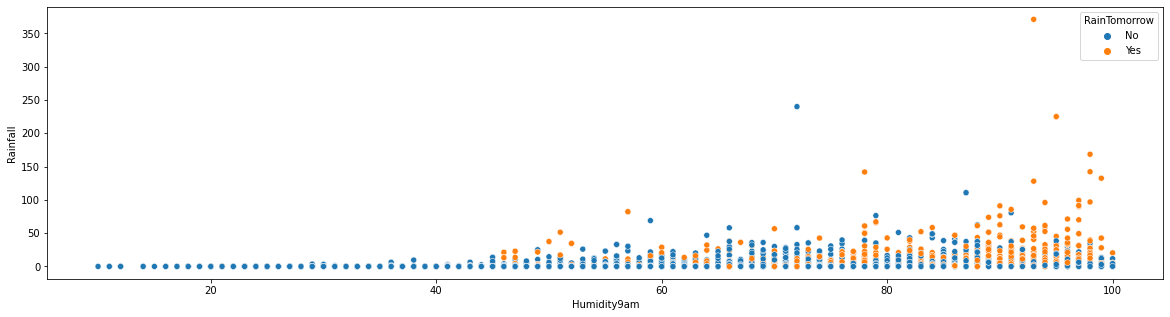

In [74]:
plt.figure(figsize=(20,5))
sns.scatterplot("Humidity9am",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

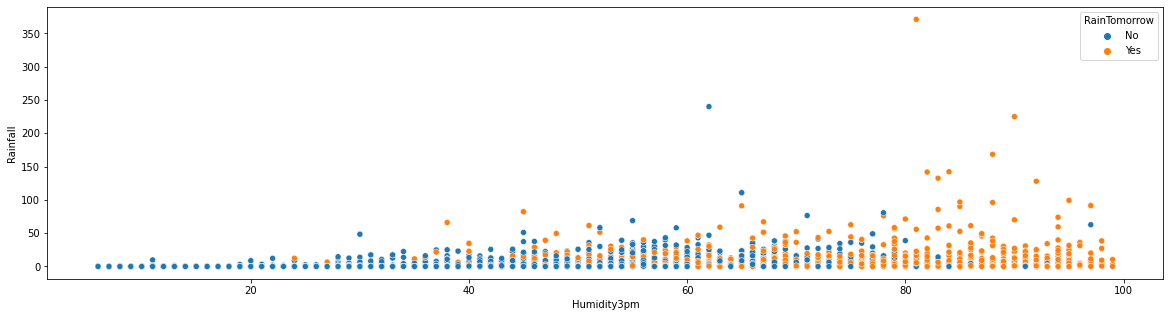

In [75]:
plt.figure(figsize=(20,5))
sns.scatterplot("Humidity3pm",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

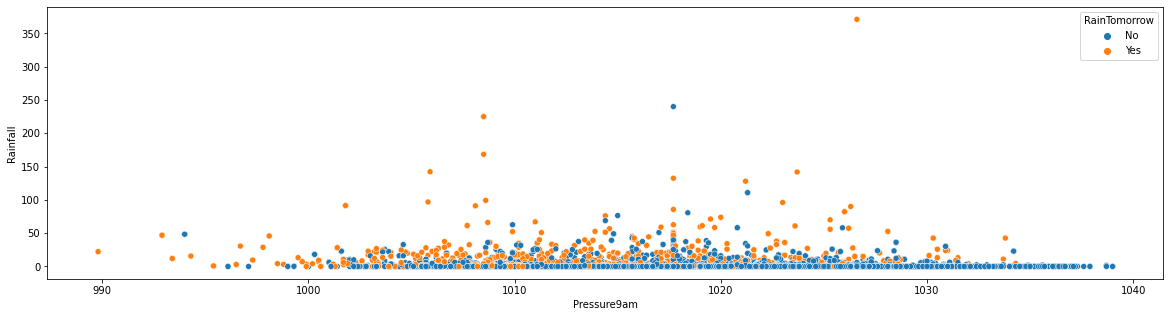

In [76]:
plt.figure(figsize=(20,5))
sns.scatterplot("Pressure9am",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

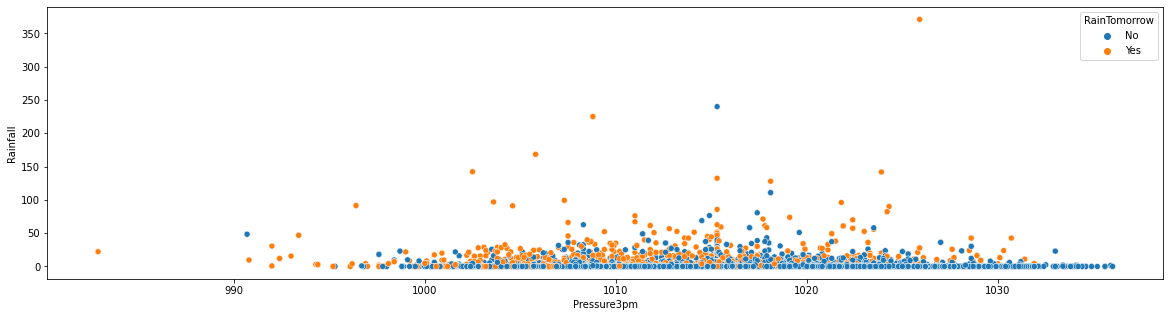

In [77]:
plt.figure(figsize=(20,5))
sns.scatterplot("Pressure3pm",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

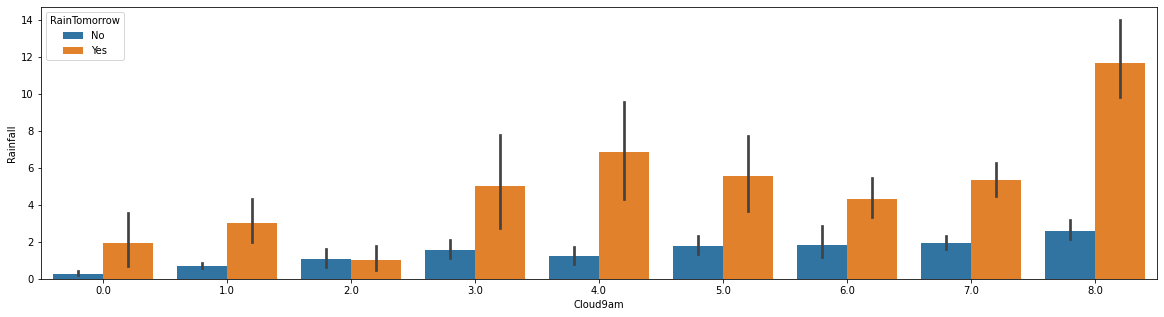

In [78]:
plt.figure(figsize=(20,5))
sns.barplot("Cloud9am",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

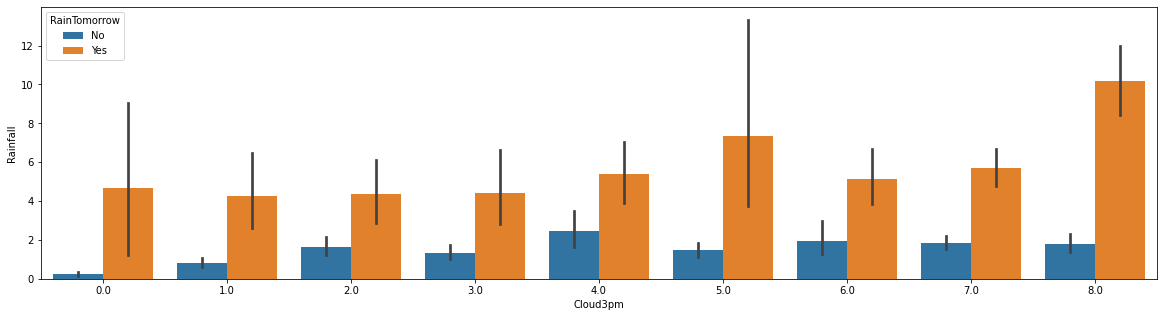

In [79]:
plt.figure(figsize=(20,5))
sns.barplot("Cloud3pm",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

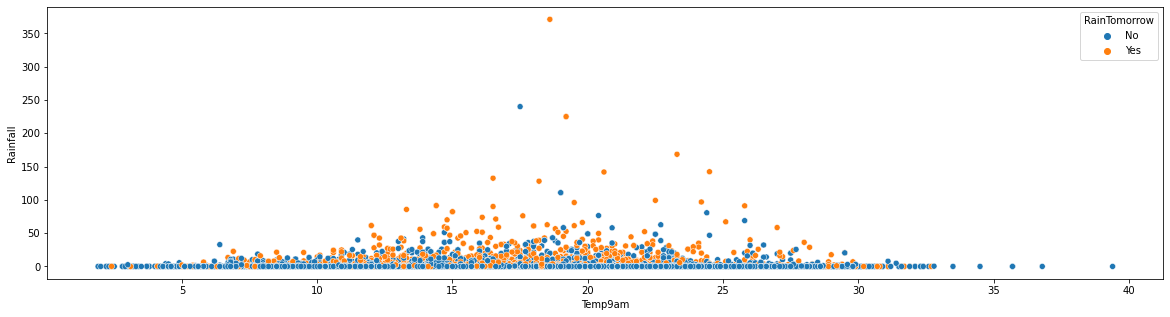

In [80]:
plt.figure(figsize=(20,5))
sns.scatterplot("Temp9am",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

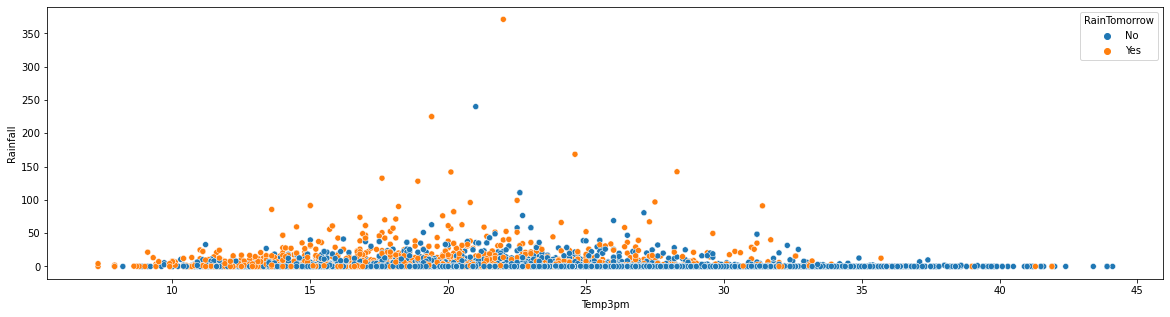

In [81]:
plt.figure(figsize=(20,5))
sns.scatterplot("Temp3pm",data=weather, y='Rainfall', hue='RainTomorrow')

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

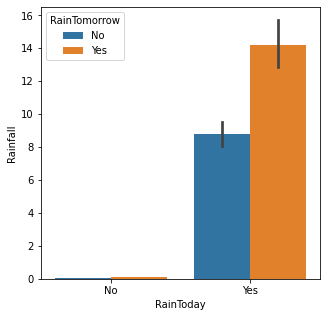

In [82]:
plt.figure(figsize=(5,5))
sns.barplot("RainToday",data=weather, y='Rainfall', hue='RainTomorrow')

# Label Encoding:

In [83]:
enc = LabelEncoder()
for i in weather.columns:
    if weather[i].dtypes=="object":
        weather[i]=enc.fit_transform(weather[i].values.reshape(-1,1))

In [84]:
weather.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
Month              int64
Year               int64
dtype: object

# Correlation:

In [85]:
weather.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116555,0.064220,0.005801,0.112136,0.051015,-0.035408,0.230018,-0.027103,-0.027736,...,-0.020292,0.031027,0.019062,0.118062,0.060441,0.003071,0.002824,-0.002019,-0.082407,0.486405
MinTemp,0.116555,1.000000,0.717522,0.085765,0.189110,0.052745,-0.145446,0.230200,-0.041781,-0.147147,...,-0.423261,0.074114,0.039291,0.887111,0.685859,0.064752,0.092965,0.009448,-0.245872,0.044200
MaxTemp,0.064220,0.717522,1.000000,-0.087595,0.243441,0.269371,-0.224078,0.139909,-0.213776,-0.180689,...,-0.403283,-0.216731,-0.210380,0.866085,0.974690,-0.224693,-0.152672,0.015662,-0.163056,0.119461
Rainfall,0.005801,0.085765,-0.087595,1.000000,0.013209,-0.117082,0.037106,0.082628,0.093072,0.038153,...,-0.031261,0.155825,0.125417,-0.007356,-0.090649,0.464941,0.219015,-0.013029,-0.016258,0.004491
Evaporation,0.112136,0.189110,0.243441,0.013209,1.000000,0.143117,-0.055673,0.110523,-0.056374,-0.041282,...,-0.153593,-0.034368,-0.072635,0.230373,0.236716,-0.070088,-0.051705,0.002280,-0.006442,0.115883
Sunshine,0.051015,0.052745,0.269371,-0.117082,0.143117,1.000000,-0.073721,-0.007628,-0.055684,-0.050371,...,-0.031698,-0.329071,-0.316385,0.184779,0.282476,-0.160716,-0.233448,-0.003283,-0.008203,0.065822
WindGustDir,-0.035408,-0.145446,-0.224078,0.037106,-0.055673,-0.073721,1.000000,0.025577,0.403562,0.505799,...,-0.025847,0.108781,0.081204,-0.176350,-0.237932,0.125188,0.051832,0.015683,0.034823,-0.088340
WindGustSpeed,0.230018,0.230200,0.139909,0.082628,0.110523,-0.007628,0.025577,1.000000,-0.068545,0.070677,...,-0.372553,0.016892,0.073714,0.202275,0.102066,0.076890,0.190274,-0.002454,0.051063,-0.049612
WindDir9am,-0.027103,-0.041781,-0.213776,0.093072,-0.056374,-0.055684,0.403562,-0.068545,1.000000,0.249527,...,0.072945,0.084988,0.066660,-0.103150,-0.221064,0.157324,0.032860,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147147,-0.180689,0.038153,-0.041282,-0.050371,0.505799,0.070677,0.249527,1.000000,...,-0.043655,0.063970,0.052899,-0.165066,-0.194762,0.100125,0.008918,0.003089,0.029384,-0.005812


In [86]:
weather.corr()["Rainfall"].sort_values()

Sunshine        -0.117082
Temp3pm         -0.090649
MaxTemp         -0.087595
Pressure9am     -0.069595
Pressure3pm     -0.031261
Month           -0.016258
Day             -0.013029
Temp9am         -0.007356
Year             0.004491
Location         0.005801
Evaporation      0.013209
WindSpeed3pm     0.021594
WindGustDir      0.037106
WindDir3pm       0.038153
WindSpeed9am     0.048726
WindGustSpeed    0.082628
MinTemp          0.085765
WindDir9am       0.093072
Cloud3pm         0.125417
Cloud9am         0.155825
RainTomorrow     0.219015
Humidity9am      0.227587
Humidity3pm      0.234955
RainToday        0.464941
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [87]:
weather.corr()["Rainfall"].sort_values()

Sunshine        -0.117082
Temp3pm         -0.090649
MaxTemp         -0.087595
Pressure9am     -0.069595
Pressure3pm     -0.031261
Month           -0.016258
Day             -0.013029
Temp9am         -0.007356
Year             0.004491
Location         0.005801
Evaporation      0.013209
WindSpeed3pm     0.021594
WindGustDir      0.037106
WindDir3pm       0.038153
WindSpeed9am     0.048726
WindGustSpeed    0.082628
MinTemp          0.085765
WindDir9am       0.093072
Cloud3pm         0.125417
Cloud9am         0.155825
RainTomorrow     0.219015
Humidity9am      0.227587
Humidity3pm      0.234955
RainToday        0.464941
Rainfall         1.000000
Name: Rainfall, dtype: float64

<AxesSubplot:>

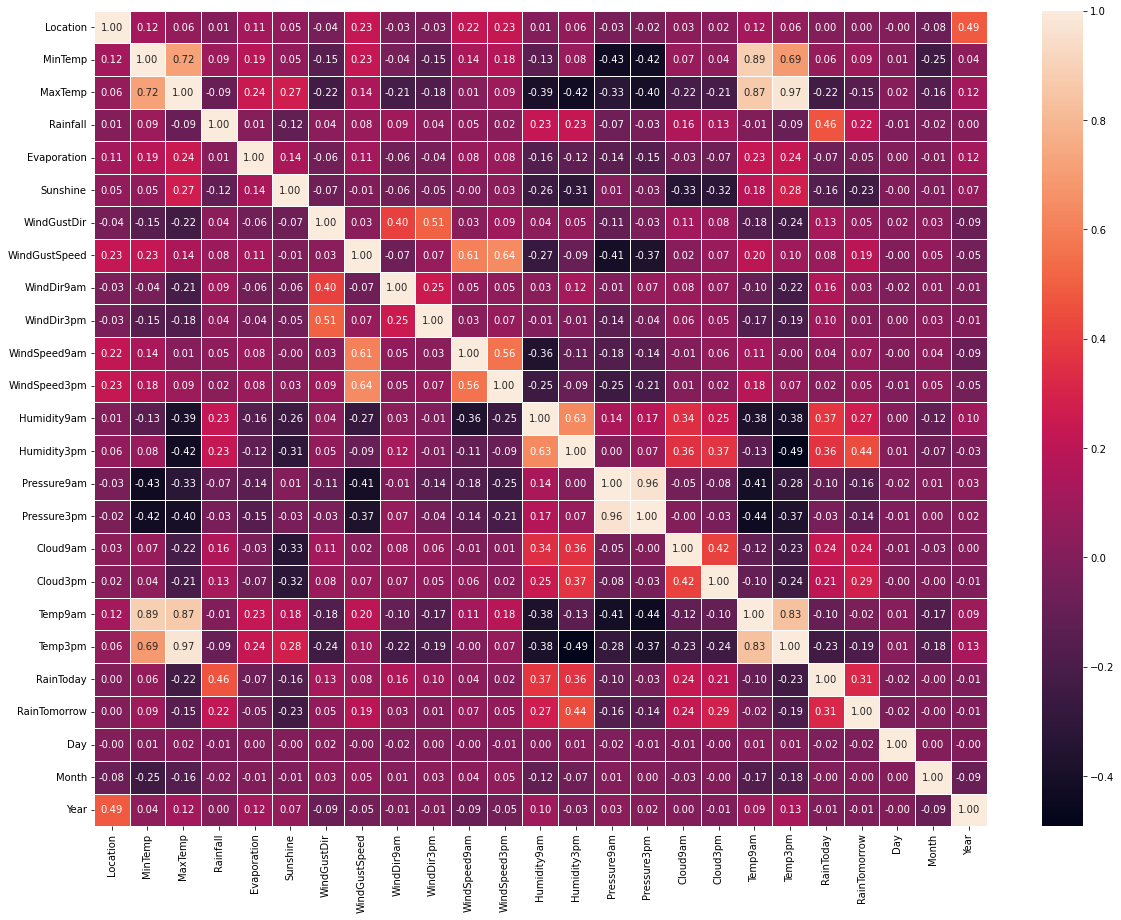

In [88]:
# Checking Correlation with Heatmap:

plt.figure(figsize=(20,15))
sns.heatmap(weather.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

**Observations:**

Max correlation is with RainToday

Min correlation is with Sunshine

**For Target Variable "Rain Tomorrow"**

Max correlation is with Humidity3pm

Min correlation is with Sunshine

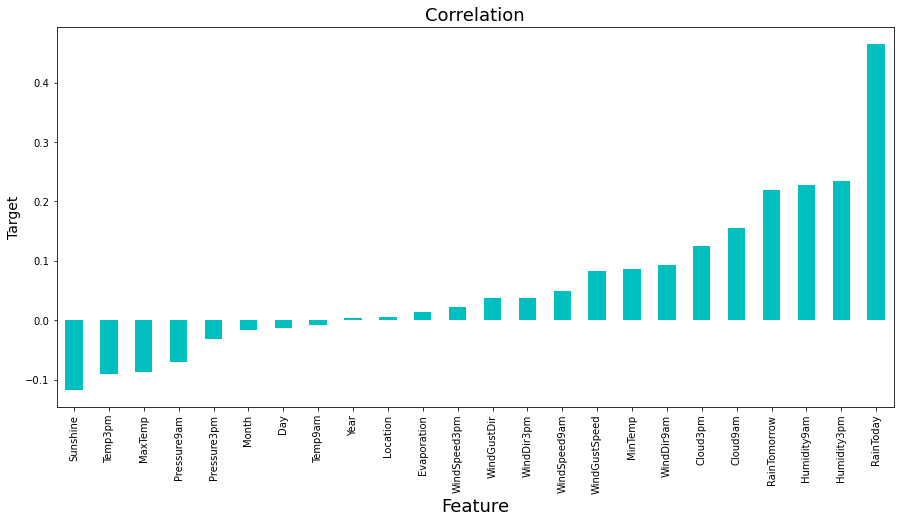

In [89]:
plt.figure(figsize=(15,7))
weather.corr()['Rainfall'].sort_values(ascending=True).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

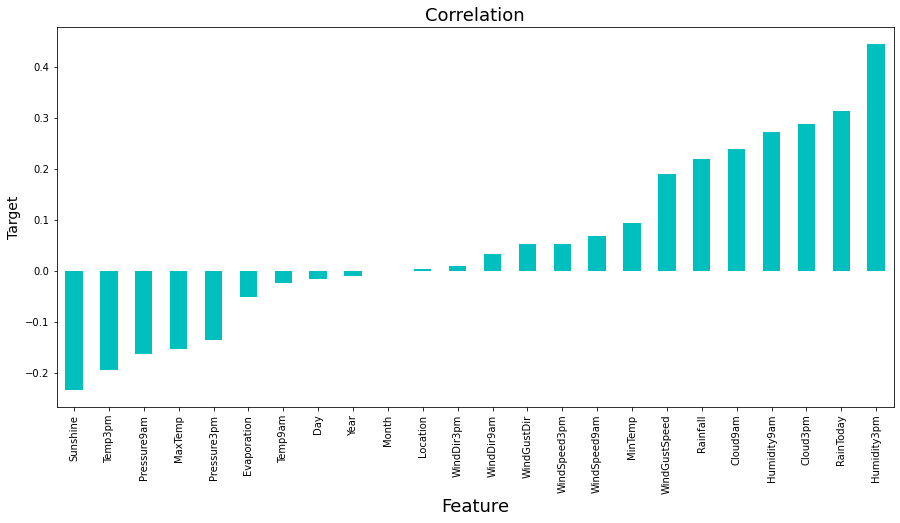

In [90]:
plt.figure(figsize=(15,7))
weather.corr()['RainTomorrow'].sort_values(ascending=True).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Outliers Detection

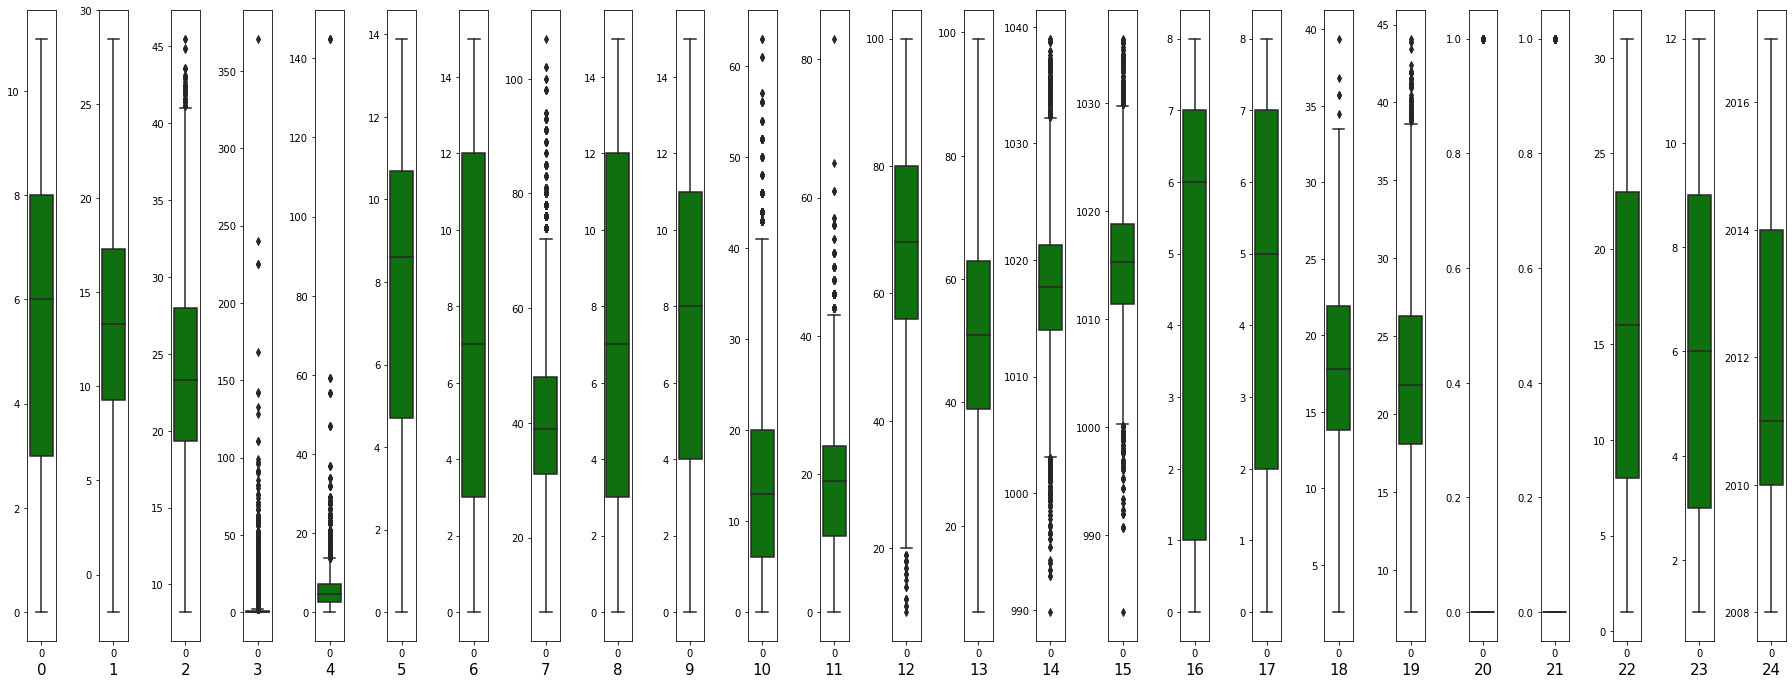

In [91]:
columns=weather.columns.values
ncol=25
nrows=8
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(columns)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=weather[columns[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

In [92]:
# Removing Outliers using Z score method :

In [93]:
variable = weather[['MaxTemp', 'Evaporation', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(variable))

# Creating new dataframe
weather_forecast = weather[(z<3).all(axis=1)]
weather_forecast.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,14,...,1007.1,8.0,8.0,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,15,...,1007.8,1.0,4.0,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,15,...,1008.7,2.0,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,0,...,1012.8,8.0,7.0,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008


In [94]:
weather_forecast.shape

(8075, 25)

In [95]:
# To find the number of dropped rows :

weather.shape[0]-weather_forecast.shape[0]

350

In [96]:
# To find the data loss :

loss_percent=(6332-6069)/6332*100
print(loss_percent,"%")

4.153506001263424 %


In [97]:
# For Target Variable "Rain Tomorrow"

In [98]:
variables = weather[['Rainfall', 'MaxTemp', 'Evaporation', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']]

z1=np.abs(zscore(variables))

# Creating new dataframe
weather_forecast1 = weather[(z1<3).all(axis=1)]
weather_forecast1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,14,...,1007.1,8.0,8.0,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,15,...,1007.8,1.0,4.0,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,15,...,1008.7,2.0,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,0,...,1012.8,8.0,7.0,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008


In [99]:
weather_forecast1.shape

(7965, 25)

In [100]:
# To find the number of dropped rows :

weather.shape[0]-weather_forecast1.shape[0]

460

In [101]:
# To find the data loss :

loss_percent1=(6332-5972)/6332*100
print(loss_percent1,"%")

5.685407454200885 %


In [102]:
weather_forecast1=weather_forecast1.drop(columns="Location", axis=1)

In [103]:
weather_forecast1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,13.4,22.9,0.6,3.0,13.8,13,44.0,13,14,20.0,...,1007.1,8.0,8.0,16.9,21.8,0,0,1,12,2008
1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,15,4.0,...,1007.8,1.0,4.0,17.2,24.3,0,0,2,12,2008
2,12.9,25.7,0.0,4.6,7.7,15,46.0,13,15,19.0,...,1008.7,2.0,2.0,21.0,23.2,0,0,3,12,2008
3,9.2,28.0,0.0,1.8,8.0,4,24.0,9,0,11.0,...,1012.8,8.0,7.0,18.1,26.5,0,0,4,12,2008
4,17.5,32.3,1.0,3.8,11.9,13,41.0,1,7,7.0,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008


# Checking Skewness:

In [105]:
#for Target variable 'Rainfall'
weather_forecast.skew()

Location         -0.037561
MinTemp          -0.093740
MaxTemp           0.324194
Rainfall         13.813712
Evaporation       1.076644
Sunshine         -0.519362
WindGustDir       0.108185
WindGustSpeed     0.545676
WindDir9am        0.147656
WindDir3pm       -0.128780
WindSpeed9am      0.713575
WindSpeed3pm      0.299363
Humidity9am      -0.234755
Humidity3pm       0.125791
Pressure9am       0.013912
Pressure3pm       0.039745
Cloud9am         -0.319052
Cloud3pm         -0.226985
Temp9am          -0.034110
Temp3pm           0.343313
RainToday         1.232970
RainTomorrow      1.257260
Day               0.005914
Month             0.053131
Year              0.429803
dtype: float64

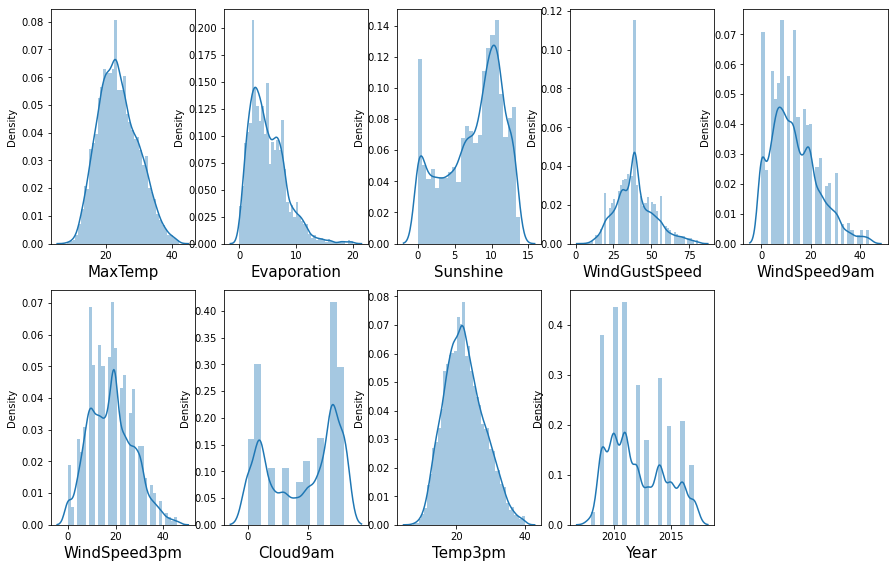

In [106]:
columns=['MaxTemp', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Temp3pm', 'Year']

plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in weather_forecast[columns]:
    if plotnumber<=24:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(weather_forecast[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [107]:
# Removing skewness using yeo-johnson method

In [108]:
columns=['MaxTemp', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Temp3pm', 'Year']
weather_forecast[columns]=power_transform(weather_forecast[columns],method='yeo-johnson')
weather_forecast[columns]

,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Cloud9am,Temp3pm,Year
0,-0.071880,-0.544949,1.678745,0.442340,0.778138,0.666546,1.167546,-0.021999,-4.323764e-13
1,0.292239,-0.924156,-0.054781,0.442340,-0.988180,0.468835,-1.243932,0.398495,-4.323764e-13
2,0.388343,0.062427,-0.028205,0.587139,0.694166,0.859933,-0.874970,0.216621,-4.323764e-13
3,0.745278,-1.142515,0.051841,-1.259440,-0.068886,-0.969979,1.167546,0.748824,-4.323764e-13
4,1.369814,-0.221302,1.130830,0.218369,-0.546401,0.266314,0.839957,1.230259,-4.323764e-13
...,...,...,...,...,...,...,...,...,...
8420,0.012573,0.599954,-1.607431,-0.599370,0.140561,-0.724664,1.167546,0.081288,5.176415e-13
8421,0.324418,1.892058,-0.186849,-1.466249,0.140561,-0.969979,-1.243932,0.431062,5.176415e-13
8422,0.576761,-0.075151,1.446457,-0.094353,-0.296013,-0.969979,0.508376,0.686382,5.176415e-13
8423,0.592242,-0.147079,1.475369,-0.871453,0.140561,-1.229329,-0.517940,0.670687,5.176415e-13


In [109]:
# To verify:

weather_forecast.skew()

Location         -0.037561
MinTemp          -0.093740
MaxTemp          -0.013736
Rainfall         13.813712
Evaporation      -0.014722
Sunshine         -0.391426
WindGustDir       0.108185
WindGustSpeed     0.004693
WindDir9am        0.147656
WindDir3pm       -0.128780
WindSpeed9am     -0.110392
WindSpeed3pm     -0.076366
Humidity9am      -0.234755
Humidity3pm       0.125791
Pressure9am       0.013912
Pressure3pm       0.039745
Cloud9am         -0.358179
Cloud3pm         -0.226985
Temp9am          -0.034110
Temp3pm          -0.012605
RainToday         1.232970
RainTomorrow      1.257260
Day               0.005914
Month             0.053131
Year              0.000000
dtype: float64

In [110]:
#checking skewness after removal through data visualization using distplot

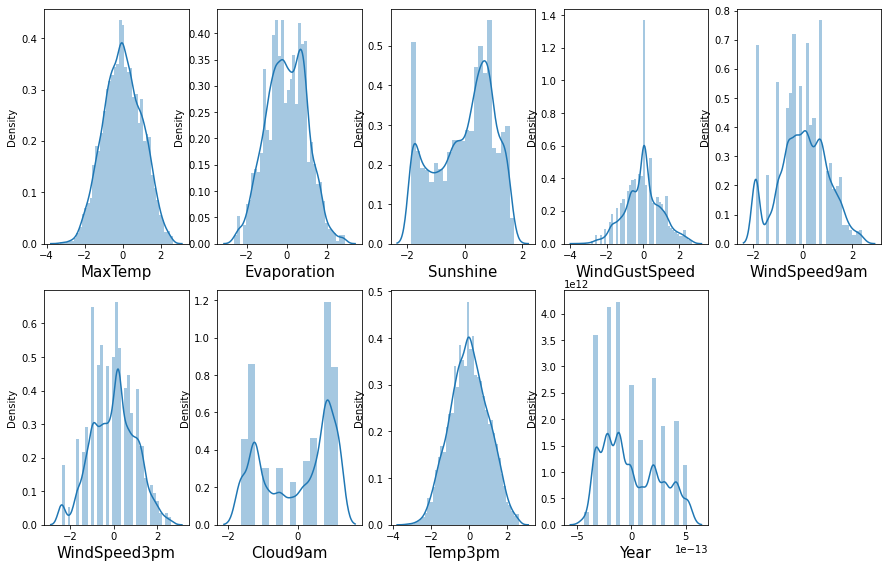

In [111]:
columns=['MaxTemp', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Temp3pm', 'Year']

plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in weather_forecast[columns]:
    if plotnumber<=24:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(weather_forecast[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [112]:
#for Target variable 'RainTomorrow'
weather_forecast1.skew()

MinTemp         -0.083677
MaxTemp          0.316669
Rainfall         3.510588
Evaporation      1.070337
Sunshine        -0.529068
WindGustDir      0.109142
WindGustSpeed    0.543210
WindDir9am       0.156007
WindDir3pm      -0.125105
WindSpeed9am     0.713157
WindSpeed3pm     0.298719
Humidity9am     -0.228988
Humidity3pm      0.125197
Pressure9am      0.010008
Pressure3pm      0.037371
Cloud9am        -0.305725
Cloud3pm        -0.215839
Temp9am         -0.033308
Temp3pm          0.335888
RainToday        1.302875
RainTomorrow     1.297762
Day              0.002697
Month            0.048897
Year             0.429681
dtype: float64

In [113]:
# Removing skewness using yeo-johnson method

In [114]:
columns_=['MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Temp3pm', 'Year']
weather_forecast1[columns_]=power_transform(weather_forecast1[columns_],method='yeo-johnson')
weather_forecast1[columns_]

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Cloud9am,Temp3pm,Year
0,-0.075735,0.774204,-0.543464,1.684305,0.446642,0.782414,0.666711,1.174241,-0.026447,-4.691803e-13
1,0.287171,-0.653653,-0.923204,-0.067397,0.446642,-0.984707,0.468766,-1.233968,0.392880,-4.691803e-13
2,0.383010,-0.653653,0.064332,-0.040650,0.591429,0.698440,0.860344,-0.861348,0.211457,-4.691803e-13
3,0.739151,-0.653653,-1.141970,0.039936,-1.254405,-0.064772,-0.971108,1.174241,0.742563,-4.691803e-13
4,1.363009,1.136761,-0.219528,1.129314,0.222704,-0.542548,0.266024,0.849862,1.223572,-4.691803e-13
...,...,...,...,...,...,...,...,...,...,...
8420,0.008408,-0.653653,0.601810,-1.619125,-0.594757,0.144747,-0.725708,1.174241,0.076513,5.621059e-13
8421,0.319259,-0.653653,1.892321,-0.200249,-1.461041,0.144747,-0.971108,-1.233968,0.425375,5.621059e-13
8422,0.570971,-0.653653,-0.073296,1.448890,-0.089942,-0.292006,-0.971108,0.520869,0.680214,5.621059e-13
8423,0.586418,-0.653653,-0.145260,1.478182,-0.866689,0.144747,-1.230490,-0.502739,0.664545,5.621059e-13


In [115]:
weather_forecast1.skew()

MinTemp         -0.083677
MaxTemp         -0.014551
Rainfall         1.042732
Evaporation     -0.014946
Sunshine        -0.390820
WindGustDir      0.109142
WindGustSpeed    0.004385
WindDir9am       0.156007
WindDir3pm      -0.125105
WindSpeed9am    -0.110813
WindSpeed3pm    -0.076182
Humidity9am     -0.228988
Humidity3pm      0.125197
Pressure9am      0.010008
Pressure3pm      0.037371
Cloud9am        -0.351533
Cloud3pm        -0.215839
Temp9am         -0.033308
Temp3pm         -0.013320
RainToday        1.302875
RainTomorrow     1.297762
Day              0.002697
Month            0.048897
Year             0.000000
dtype: float64

In [116]:
# checking skewness after removal through data visualization using distplot

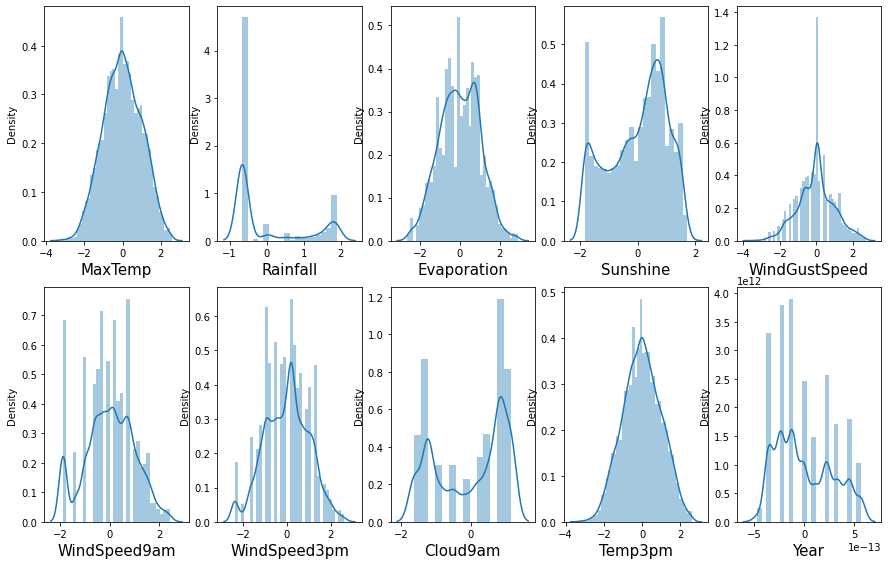

In [117]:
columns_=['MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Temp3pm', 'Year']
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in weather_forecast1[columns_]:
    if plotnumber<=10:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(weather_forecast1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Data Preprocessing

**Splitting the training and testing dataset:**

In [118]:
x=weather_forecast.drop("Rainfall",axis=1)
y=weather_forecast["Rainfall"]

In [119]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [120]:
x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,-0.071880,-0.544949,1.678745,13,0.442340,13,14,0.778138,...,1007.1,1.167546,8.0,16.9,-0.021999,0,0,1,12,-4.323764e-13
1,1,7.4,0.292239,-0.924156,-0.054781,14,0.442340,6,15,-0.988180,...,1007.8,-1.243932,4.0,17.2,0.398495,0,0,2,12,-4.323764e-13
2,1,12.9,0.388343,0.062427,-0.028205,15,0.587139,13,15,0.694166,...,1008.7,-0.874970,2.0,21.0,0.216621,0,0,3,12,-4.323764e-13
3,1,9.2,0.745278,-1.142515,0.051841,4,-1.259440,9,0,-0.068886,...,1012.8,1.167546,7.0,18.1,0.748824,0,0,4,12,-4.323764e-13
4,1,17.5,1.369814,-0.221302,1.130830,13,0.218369,1,7,-0.546401,...,1006.0,0.839957,8.0,17.8,1.230259,0,0,5,12,-4.323764e-13


In [121]:
y.head()

0    0.6
1    0.0
2    0.0
3    0.0
4    1.0
Name: Rainfall, dtype: float64

In [122]:
x.shape, y.shape

((8075, 24), (8075,))

In [123]:
# For "Rain Tomorrow"

In [124]:
x1=weather_forecast1.drop("RainTomorrow",axis=1)
y1=weather_forecast1["RainTomorrow"]

In [125]:
x1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Day', 'Month', 'Year'],
      dtype='object')

In [126]:
x1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,13.4,-0.075735,0.774204,-0.543464,1.684305,13,0.446642,13,14,0.782414,...,1007.7,1007.1,1.174241,8.0,16.9,-0.026447,0,1,12,-4.691803e-13
1,7.4,0.287171,-0.653653,-0.923204,-0.067397,14,0.446642,6,15,-0.984707,...,1010.6,1007.8,-1.233968,4.0,17.2,0.392880,0,2,12,-4.691803e-13
2,12.9,0.383010,-0.653653,0.064332,-0.040650,15,0.591429,13,15,0.698440,...,1007.6,1008.7,-0.861348,2.0,21.0,0.211457,0,3,12,-4.691803e-13
3,9.2,0.739151,-0.653653,-1.141970,0.039936,4,-1.254405,9,0,-0.064772,...,1017.6,1012.8,1.174241,7.0,18.1,0.742563,0,4,12,-4.691803e-13
4,17.5,1.363009,1.136761,-0.219528,1.129314,13,0.222704,1,7,-0.542548,...,1010.8,1006.0,0.849862,8.0,17.8,1.223572,0,5,12,-4.691803e-13


In [127]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

In [128]:
x1.shape, y1.shape

((7965, 23), (7965,))

In [129]:
y1.value_counts()

0    6150
1    1815
Name: RainTomorrow, dtype: int64

**The data is not balanced. So, we will use oversampling method to balance it.**

**Oversampling using the SMOTE**

In [130]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [131]:
Smote = SMOTE()
x1, y1 = Smote.fit_resample(x1,y1)

In [132]:
y1.value_counts()

0    6150
1    6150
Name: RainTomorrow, dtype: int64

**Great , Data is balanced now.**

In [133]:
# For Target Column "Rainfall"
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [134]:
# For Target Column "RainTomorrow"
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

**Checking for Multicolinearity using VIF**

In [135]:
# For Target Column "Rainfall"

vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.590554,Location
1,8.427902,MinTemp
2,26.694366,MaxTemp
3,1.223443,Evaporation
4,1.289119,Sunshine
5,1.615502,WindGustDir
6,2.325236,WindGustSpeed
7,1.352373,WindDir9am
8,1.489570,WindDir3pm
9,2.006981,WindSpeed9am


**We observed that the VIF value is more than 10 in the columns MaxTemp, 'Pressure9am', 'Pressure3pm', 'Temp9am' and 'Temp3pm'. But column 'Temp3pm' is having highest VIF value. So, we will drop column 'Temp3pm'. Also we will drop 'Year' column as it have no relation.**

In [136]:
x.drop('Temp3pm', axis =1, inplace=True)

In [137]:
# To verify:

vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.587302,Location
1,8.385902,MinTemp
2,9.603543,MaxTemp
3,1.223440,Evaporation
4,1.288825,Sunshine
5,1.612942,WindGustDir
6,2.307113,WindGustSpeed
7,1.352262,WindDir9am
8,1.487787,WindDir3pm
9,2.006803,WindSpeed9am


**Here we can see that Multicolinearity is still present in the column 'Pressure9am', 'Pressure3pm' and 'Temp9am'. So, we will again drop highest VIF value column which is 'Pressure9am' for removing Multicolinearity.**

In [138]:
x.drop('Pressure9am', axis =1, inplace=True)

In [139]:
# To verify:

vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.587231,Location
1,8.228168,MinTemp
2,9.210069,MaxTemp
3,1.220914,Evaporation
4,1.287881,Sunshine
5,1.598039,WindGustDir
6,2.278423,WindGustSpeed
7,1.329678,WindDir9am
8,1.419852,WindDir3pm
9,2.002453,WindSpeed9am


**we can see that Multicolinearity is still present in the column 'Temp9am'. So, we will again drop highest VIF value column which is 'Temp9am' for removing Multicolinearity.**

In [140]:
x.drop('Temp9am', axis =1, inplace=True)

In [141]:
# To verify:

vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif


,VIF values,Features
0,1.586834,Location
1,4.478778,MinTemp
2,5.265554,MaxTemp
3,1.220558,Evaporation
4,1.286485,Sunshine
5,1.596826,WindGustDir
6,2.242948,WindGustSpeed
7,1.329613,WindDir9am
8,1.419607,WindDir3pm
9,1.986588,WindSpeed9am


**So ,  Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.**

In [142]:
# For Target Column "RainTomorrow"

In [143]:
vif_ = pd.DataFrame()
vif_['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif_['Features'] = x1.columns
vif_

,VIF values,Features
0,9.267174,MinTemp
1,24.117117,MaxTemp
2,4.715763,Rainfall
3,1.234262,Evaporation
4,1.276601,Sunshine
5,1.593541,WindGustDir
6,2.157338,WindGustSpeed
7,1.392262,WindDir9am
8,1.485590,WindDir3pm
9,1.994868,WindSpeed9am


**We observed that the VIF value is more than 10 in the columns MaxTemp, 'Pressure9am', 'Pressure3pm', 'Temp9am' and 'Temp3pm'. But column 'Temp3pm' is having highest VIF value. So, we will drop column 'Temp3pm'. Also we will drop 'Year' column as it have no relation.**

In [144]:
x1.drop('Year', axis =1, inplace=True)

In [145]:
x1.drop('Temp3pm', axis =1, inplace=True)

In [146]:
# To verify:

vif_ = pd.DataFrame()
vif_['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif_['Features'] = x1.columns
vif_

,VIF values,Features
0,8.939781,MinTemp
1,10.029393,MaxTemp
2,4.711259,Rainfall
3,1.225757,Evaporation
4,1.270005,Sunshine
5,1.583512,WindGustDir
6,2.116932,WindGustSpeed
7,1.388145,WindDir9am
8,1.475960,WindDir3pm
9,1.993455,WindSpeed9am


Here we can see that Multicolinearity is still present in the column 'MaxTemp', 'Pressure9am', 'Pressure3pm' and 'Temp9am'. So, we will again drop highest VIF value column which is 'Pressure9am' for removing Multicolinearity.

In [148]:
x1.drop('Pressure9am', axis =1, inplace=True)

In [149]:
# To verify:
vif_ = pd.DataFrame()
vif_['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif_['Features'] = x1.columns
vif_

,VIF values,Features
0,8.767934,MinTemp
1,9.677011,MaxTemp
2,4.699741,Rainfall
3,1.223997,Evaporation
4,1.269775,Sunshine
5,1.567813,WindGustDir
6,2.085532,WindGustSpeed
7,1.356513,WindDir9am
8,1.399575,WindDir3pm
9,1.991481,WindSpeed9am


Here we can see that Multicolinearity is still present in the column 'MaxTemp' and 'Temp9am'. So, we will again drop highest VIF value column which is 'Temp9am' for removing Multicolinearity.

In [150]:
x1.drop('Temp9am', axis =1, inplace=True)

In [151]:
# To verify:

vif_ = pd.DataFrame()
vif_['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif_['Features'] = x1.columns
vif_

,VIF values,Features
0,4.605442,MinTemp
1,5.475672,MaxTemp
2,4.694144,Rainfall
3,1.223972,Evaporation
4,1.265221,Sunshine
5,1.566531,WindGustDir
6,2.060168,WindGustSpeed
7,1.356497,WindDir9am
8,1.399038,WindDir3pm
9,1.978050,WindSpeed9am


**Great ,Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.**

In [152]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 28)

**Linear Regression:**

In [153]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predLR)))

R2_score: 0.21485726813926453
Mean abs error: 3.1860174408009105
Mean squared error: 85.50111150603446
Root Mean Squared Error:  9.246681107620963


**Random Forest regression model:**

In [154]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predRFR)))

R2_Score: 0.33194254749459473
Mean abs error: 2.0632349845201228
Mean squared error: 72.75066356881663
Root Mean Squared Error:  8.52939995362022


**KNN Regressor:**

In [155]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: 0.22756904751799722
Mean abs error: 2.263777089783282
Mean squared error: 84.11681382104499
Root Mean Squared Error:  9.171521892305822


**Support Vector Regression Model**

In [156]:
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predsv)))

R2_Score: 0.1466777790735706
Mean abs error: 2.142823463470638
Mean squared error: 92.92577693370137
Root Mean Squared Error:  9.639801706140089


In [157]:
# Cross Validation Score for all the model

In [158]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

CV score for Linear Regression:  0.24661312442928454


In [159]:
#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

CV score for Random forest Regression:  0.40155259093455176


In [160]:
#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Regression:  0.27883063879774256


In [161]:
#CV Score for Support Vector Regression
print('CV score for Support Vector  Regression: ',cross_val_score(sv,x,y,cv=5).mean())

CV score for Support Vector  Regression:  0.17906789071768167


**From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Regressor is the best model.**

# Hyper Parameter Tuning

In [162]:
RFR=RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1)

In [163]:
grid_params = {
                'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]
                }

In [164]:
CV_RFR = GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)

In [165]:
CV_RFR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [166]:
CV_RFR.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [167]:
Rain_forecast = RandomForestRegressor(random_state=50, n_estimators=200,max_depth= 6, max_features= 'log2')
Rain_forecast.fit(x_train, y_train)
#prediction
RFRpred = Rain_forecast.predict(x_test)
#R2 score
acc = r2_score(y_test,RFRpred)
print(acc*100)

22.98663840327756


In [168]:
#saving the model at local file system
filename='Rainfall_Prediction.pickle'
pickle.dump(Rain_forecast,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([0.46584502, 0.39689461, 1.12233269, ..., 0.22259043, 1.15294802,
       0.50824576])

In [169]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loaded_model_r.predict(x_test))
Rainfall_Forecasting = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Rainfall_Forecasting

,Original,Predicted
0,0.0,0.465845
1,0.2,0.396895
2,0.2,1.122333
3,0.0,0.455452
4,0.0,0.421338
...,...,...
1610,0.0,0.384738
1611,2.6,7.082828
1612,0.0,0.222590
1613,0.0,1.152948


# Classification Model:

In [170]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=30)

In [171]:
x1.shape, y1.shape

((12300, 19), (12300,))

In [172]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((8610, 19), (8610,), (3690, 19), (3690,))

**Random Forest Classifier:**

In [173]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.9222222222222223
confusion_matrix: 
 [[1717  118]
 [ 169 1686]]
classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1835
           1       0.93      0.91      0.92      1855

    accuracy                           0.92      3690
   macro avg       0.92      0.92      0.92      3690
weighted avg       0.92      0.92      0.92      3690



**Decision Tree Classifier:**

In [174]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8512195121951219
confusion_matrix: 
 [[1539  296]
 [ 253 1602]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1835
           1       0.84      0.86      0.85      1855

    accuracy                           0.85      3690
   macro avg       0.85      0.85      0.85      3690
weighted avg       0.85      0.85      0.85      3690



**KNN Classifier:**

In [175]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8558265582655826
confusion_matrix: 
 [[1409  426]
 [ 106 1749]]
classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1835
           1       0.80      0.94      0.87      1855

    accuracy                           0.86      3690
   macro avg       0.87      0.86      0.85      3690
weighted avg       0.87      0.86      0.85      3690



In [178]:
#CV Score for Random Forest Classifier
print('CV score for Random forest Classifier: ',cross_val_score(RFR,x1,y1,cv=5).mean())

#CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x1,y1,cv=5).mean())


CV score for Random forest Classifier:  0.30298179628049604
CV score for KNN Classifier:  0.7879674796747967


**Based on the Accuracy Score and Cross-validation Score and performance of the model we will select Random Forest Classifier as the best model compare to Gradient Boosting Classifier.**

# Hyper parameter tuning

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = 42)

In [180]:
rfc=RandomForestClassifier(random_state=30)

In [181]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [182]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [183]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [184]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'n_estimators': 900}

In [185]:
Weather_Forecast=RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 900, max_depth=22, criterion='entropy')
Weather_Forecast.fit(x_train,y_train)
predict=Weather_Forecast.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("classification_report: \n",classification_report(y_test,predict))

accuracy score:  0.9243902439024391
confusion_matrix: 
 [[1740  147]
 [ 132 1671]]
classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1887
           1       0.92      0.93      0.92      1803

    accuracy                           0.92      3690
   macro avg       0.92      0.92      0.92      3690
weighted avg       0.92      0.92      0.92      3690



In [186]:
# Saving the Model :

import pickle
filename='RainFall_Tomorrow_Predict.pickle'
pickle.dump(Weather_Forecast,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, ..., 0, 0, 0])

In [187]:
a =np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))
RainFall_Tomorrow_Prediction=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
RainFall_Tomorrow_Prediction

,Orginal,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
3685,0,0
3686,1,1
3687,1,0
3688,1,0


**As we can see, predicted and original values matches approx 100%. So , we achieved a good accuarcy.**

In [188]:
model =RainFall_Tomorrow_Prediction.to_csv('RainFall_Tomorrow_Prediction.csv')
model